https://colab.research.google.com/drive/1trlp20kt388usZB0grjc2MKR7i4PV67a

In [0]:
import pandas as pd



In [0]:
datos = pd.read_csv('kickstarter_clean2.csv')
categories = pd.Series(datos[['art', 'comics', 'crafts', 'dance','design', 'fashion', 'film & video',
                              'food', 'games', 'journalism','music', 'photography',
                              'publishing', 'technology', 'theater']].idxmax(axis=1) , name = 'categories')
datos_categories = datos.drop(['art', 'comics', 'crafts', 'dance','design', 'fashion', 'film & video',
                              'food', 'games', 'journalism','music', 'photography',
                              'publishing', 'technology', 'theater', 'AT', 'AU', 'BE', 'CA',
                              'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX',
                              'NL', 'NO', 'NZ', 'SE', 'SG', 'US'], axis = 1)#.concat(categories, axis = 1)

countries = pd.Series(datos[['AT', 'AU', 'BE', 'CA',
       'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX',
       'NL', 'NO', 'NZ', 'SE', 'SG', 'US']].idxmax(axis = 1), name = 'countries')



datos_categories = pd.concat([datos_categories, categories, countries], axis = 1)
X_categories = datos_categories.drop(['backers_count', 'state', 'usd_pledged', 'duration.1'], axis = 1)
Y_categories = datos_categories.state

Y = datos.state
X = datos.drop(['backers_count', 'state', 'usd_pledged', 'duration.1'], axis = 1)


In [0]:
X.describe(include='all')

,duration,staff_pick,start_backers_count,category_pos,usd_goal,start_usd_pledged_amount,completed_time,AT,AU,BE,...,film & video,food,games,journalism,music,photography,publishing,technology,theater,launched_month
count,2.248700e+04,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,...,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000
mean,3.038951e+06,0.090185,56.904256,5.981234,4480.108469,3583.276004,0.477902,0.002579,0.027127,0.004358,...,0.118068,0.062481,0.071686,0.018811,0.092854,0.033264,0.104282,0.064437,0.032908,5.455686
std,1.077435e+06,0.286454,174.089348,4.307605,4188.815944,16520.805699,0.290850,0.050722,0.162456,0.065873,...,0.322696,0.242032,0.257973,0.135860,0.290234,0.179328,0.305633,0.245536,0.178400,3.273636
min,2.605770e+05,0.000000,0.000000,1.000000,0.923175,0.000000,-0.105892,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.592000e+06,0.000000,3.000000,3.000000,1000.000000,101.000000,0.233750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.592000e+06,0.000000,16.000000,5.000000,3000.000000,713.000000,0.477933,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,3.456000e+06,0.000000,49.000000,8.000000,6860.745606,2796.837132,0.727250,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,5.187600e+06,1.000000,6304.000000,19.000000,16032.424000,796427.111859,2.009718,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [0]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler().fit_transform(X.values)
X  = pd.DataFrame(min_max_scaler)

In [0]:
X.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
count,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,...,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000
mean,0.563905,0.090185,0.009027,0.276735,0.279399,0.004499,0.275946,0.002579,0.027127,0.004358,...,0.118068,0.062481,0.071686,0.018811,0.092854,0.033264,0.104282,0.064437,0.032908,0.405062
std,0.218679,0.286454,0.027616,0.239311,0.261287,0.020744,0.137478,0.050722,0.162456,0.065873,...,0.322696,0.242032,0.257973,0.135860,0.290234,0.179328,0.305633,0.245536,0.178400,0.297603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473191,0.000000,0.000476,0.111111,0.062320,0.000127,0.160541,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909
50%,0.473191,0.000000,0.002538,0.222222,0.187074,0.000895,0.275961,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636
75%,0.648550,0.000000,0.007773,0.388889,0.427896,0.003512,0.393807,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3)

print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('Y_train.shape: ', Y_train.shape)
print('Y_test.shape: ', Y_test.shape)


X_train.shape:  (15740, 45)
X_test.shape:  (6747, 45)
Y_train.shape:  (15740,)
Y_test.shape:  (6747,)


In [0]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


krange = range(10,20)
kf = KFold(n_splits=10)
  

scores = []
for k in krange:
  kscores = []
  for train_index, test_index in kf.split(X_train):
    Xk_train, Yk_train = X_train.iloc[train_index], Y_train.iloc[train_index]
    Xk_test, Yk_test = X_train.iloc[test_index], Y_train.iloc[test_index]
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(Xk_train, Yk_train) 
    kscores.append(neigh.score(Xk_test, Yk_test))  
  scores.append( np.mean(kscores))

In [0]:
neigh = KNeighborsClassifier(n_neighbors=best_knn[0] + 10)
neigh.fit(X_train, Y_train) 
print(neigh.score(Xk_test, Yk_test))  

0.7865311308767471


In [0]:
#print(scores)
best_knn = np.argsort(scores)[::-1]
print(best_knn[0:4])


[0 1 3 2]


In [0]:
final_scores = []
categories_list = []
countries_list = []

kf = KFold(n_splits=10)
  
for train_index, test_index in kf.split(X_train):
  Xk_train, Yk_train = X.iloc[train_index], Y.iloc[train_index]
  Xk_test, Yk_test = X.iloc[test_index], Y.iloc[test_index]
  X_test_cate, Y_test_cate = X_categories.iloc[test_index], Y_categories.iloc[test_index]
  
  neigh = KNeighborsClassifier(n_neighbors=best_knn[0] + 10)
  neigh.fit(Xk_train, Yk_train) 
  succ_cate = X_test_cate['categories'][neigh.predict(Xk_test) == 1]
  succ_country = X_test_cate['countries'][neigh.predict(Xk_test) == 1 ]
  for cate in succ_cate:
      categories_list.append(cate)  
  for country in succ_country:
      countries_list.append(country)  

      

    

In [0]:
print(final_scores)

[0.6233881725211204]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


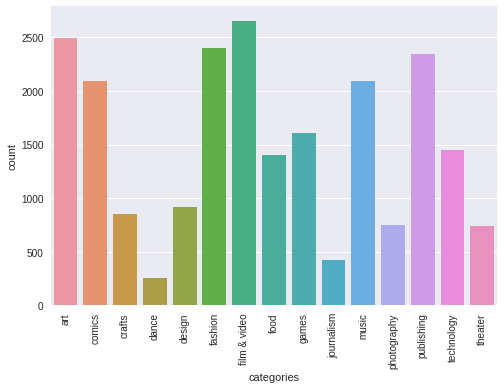

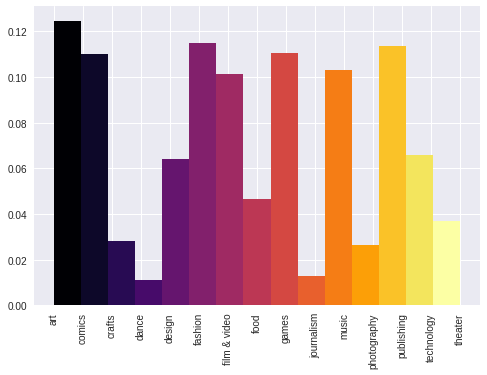

In [0]:

import matplotlib.pyplot as plt

import seaborn as sb

sb.countplot(x = 'categories', data = datos_categories)
plt.xticks(rotation=90)

plt.show()

cm = plt.cm.get_cmap('inferno')

# Plot histogram.
n, bins, patches = plt.hist(categories_list, 15, normed=1, color='green')
plt.xticks(rotation=90)

bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


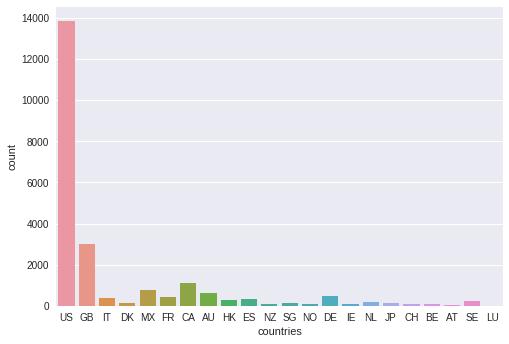

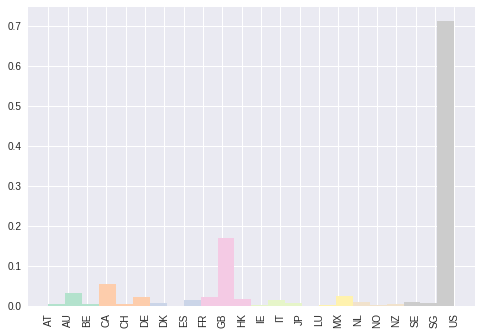

In [0]:

import matplotlib.pyplot as plt

import seaborn as sb

sb.countplot(x = 'countries', data = datos_categories)
plt.show()

cm = plt.cm.get_cmap('Pastel2')

# Plot histogram.
n, bins, patches = plt.hist(countries_list, bins = 24, normed=1, color='green')
plt.xticks(rotation=90)

bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.show()

In [0]:
plt.hist?

In [0]:
datos_countries.columns

# category columns:
# 34(-4) - 48(-4) = 14

NameError: ignored

In [0]:
np.matrix(X)[34]

matrix([[1.92615906e-01, 0.00000000e+00, 1.90355330e-03, 1.66666667e-01,
         1.00119119e-02, 4.28692905e-04, 2.56742984e-01, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]])

In [0]:
np.mean(datos['usd_pledged'])

6138.688886404925